In [4]:
import pandas as pd 
import seaborn as sns
import matplotlib as mpl
import numpy as np

pd.options.display.max_columns = 999
df = pd.read_csv('events.csv',header=0, low_memory=False)
#df['timestamp_tp'] = pd.to_datetime(df['timestamp'], format="%Y-%m-%d %H:%M:%S")
df['timestamp'] = pd.to_datetime(df['timestamp'],infer_datetime_format=True, errors='coerce')
df['hour'] = df['timestamp'].dt.hour




Index(['timestamp', 'event', 'person', 'url', 'sku', 'model', 'condition',
       'storage', 'color', 'skus', 'search_term', 'staticpage',
       'campaign_source', 'search_engine', 'channel', 'new_vs_returning',
       'city', 'region', 'country', 'device_type', 'screen_resolution',
       'operating_system_version', 'browser_version', 'hour'],
      dtype='object')

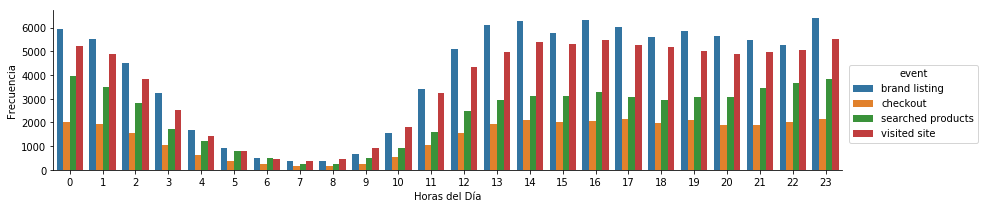

In [36]:

df_freq_horarios = df.groupby(['hour', 'event']).agg({ 'timestamp': 'count' }).reset_index() #.unstack()

fil_col = df_freq_horarios.event.isin(['checkout', 'brand listing','visited site','searched products'])
#saco el view_product porque hay mucha mas cantidad que el resto y resta claridad a la visualización. Puede ser útil saber que hay muchos mas view product que el resto de los eventos
df_freq_horarios = df_freq_horarios[fil_col]
#df_freq_horarios.columns = ['_'.join(col) for col in df_freq_horarios.columns]
#df_freq_horarios.rename(columns={'hour_': 'hour'}, inplace=True)
#df_freq_horarios

mpl.rc("figure", figsize=(45, 50))
df_freq_horarios_graph = sns.factorplot(x='hour', y='timestamp', hue='event', data=df_freq_horarios, kind='bar',size=3, aspect=4)

#df_freq_horarios_graph.set_title("ABC")
df_freq_horarios_graph.set_axis_labels(x_var="Horas del Día", y_var="Frecuencia")

In [21]:
fil_checkout = df.event.isin(['checkout'])
df_checkout_event = df[fil_checkout]

df_checkout_event = df_checkout_event.groupby(['campaign_source']).agg({ 'timestamp': 'count' }).reset_index() #.unstack()


THRESHOLD = 10
dfWithSession = df
dfWithSession['esComprador'] = df['event'] == 'checkout'  

dfWithSession['diff'] = (dfWithSession['timestamp'] - (dfWithSession['timestamp'].shift())) / np.timedelta64(1, 'm')
dfWithSession['diff'] = dfWithSession['diff'].fillna(value=0)
dfWithSession['new_session'] = dfWithSession['diff'] > THRESHOLD
dfWithSession['sessionid'] = dfWithSession['new_session'].cumsum()

dfWithSession.drop(columns=['diff'])

dfWithSession['campaign_source'] = dfWithSession['campaign_source'].fillna(value='')
#dfWithSession = dfWithSession.groupby('sessionid').agg('campaign_source', lambda x,y : len(x)>len(y))
#dfWithSession = dfWithSession.groupby('sessionid').agg({ 'campaign_source': 'max' })
#dfWithSession.columns
dfWithSession24 = dfWithSession[dfWithSession.sessionid.isin(['24']) ]
dfWithSession24


,timestamp,event,person,url,sku,model,condition,storage,color,skus,search_term,staticpage,campaign_source,search_engine,channel,new_vs_returning,city,region,country,device_type,screen_resolution,operating_system_version,browser_version,hour,esComprador,diff,new_session,sessionid
244,2018-05-24 15:13:12,visited site,0024ad28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,NaN,Paid,Returning,Santa Cruz do Sul,Rio Grande do Sul,Brazil,Computer,1280x800,Windows 7,IE 11,15,False,4032.133333,True,24
245,2018-05-24 15:13:12,ad campaign hit,0024ad28,/comprar/samsung/galaxy-win-duos,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,criteo,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15,False,0.000000,False,24
246,2018-05-24 15:13:36,viewed product,0024ad28,NaN,2750.0,Samsung Galaxy Win Duos,Bom,8GB,Cinza,NaN,NaN,NaN,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15,False,0.400000,False,24
247,2018-05-24 15:17:23,ad campaign hit,0024ad28,/comprar/samsung/galaxy-s7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,rtbhouse,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15,False,3.783333,False,24
248,2018-05-24 15:17:28,viewed product,0024ad28,NaN,8499.0,Samsung Galaxy S7,Bom,32GB,Rosa,NaN,NaN,NaN,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15,False,0.083333,False,24
249,2018-05-24 15:18:00,brand listing,0024ad28,NaN,NaN,NaN,NaN,NaN,NaN,"6357,3371,6371,2777,2718,10897,6413,3191,6791,...",NaN,NaN,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15,False,0.533333,False,24
250,2018-05-24 15:18:32,brand listing,0024ad28,NaN,NaN,NaN,NaN,NaN,NaN,"2820,2750",NaN,NaN,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15,False,0.533333,False,24
